## Step-1: 
Проверка гипотезы о равенстве средних значений в двух выборках (время доставки)

In [10]:
from typing import List, Tuple
from scipy import stats


def ttest(
    control: List[float],
    experiment: List[float],
    alpha: float = 0.05,
) -> Tuple[float, bool]:
    """Two-sample t-test for the means of two independent samples"""
    _, p_value = stats.ttest_ind(control, experiment)
    result = bool(p_value < alpha)
    return p_value, result


In [10]:
import pandas as pd

In [11]:
df = pd.read_csv("mouse.csv", sep="\t")
df.head()

,STUDY,AGE,GENDER,DECISION,DEO1,DEO2,DEO3,DEO4,DEO5,DEO6,...,AE,MOUSE1,MOUSE2,MOUSE3,MOUSE,DOUBT,OTHERCHOICE,UNCOMFORTABLE,NOSHOCK,RT
0,1,38,1,NaN,2,2,2,1,2,2,...,5.000000,6.0,5.0,5.0,5.333333,NaN,NaN,NaN,NaN,NaN
1,1,22,1,NaN,1,2,2,1,2,1,...,5.727273,5.0,6.0,6.0,5.666667,NaN,NaN,NaN,NaN,NaN
2,1,39,1,NaN,1,1,3,5,3,1,...,5.545455,6.0,6.0,6.0,6.000000,NaN,NaN,NaN,NaN,NaN
3,1,21,0,1.0,2,3,3,3,3,2,...,5.136364,4.0,7.0,7.0,6.000000,2.0,0.0,6.0,80.0,9.212427
4,1,20,0,1.0,4,2,2,2,2,2,...,4.181818,4.0,6.0,6.0,5.333333,4.0,0.0,6.5,75.0,17.071711


In [12]:
df.dropna(subset=['DECISION'], inplace=True)

In [13]:
men = df[(df['GENDER'] == 1)]['RT'].dropna().values
women = df[(df['GENDER'] == 0)]['RT'].dropna().values

In [14]:
ttest(men, women)

(0.17355983852026008, False)

## Step-2
Cравнение квантилей

In [3]:
# Пример нахождения распределения медианы с помощью бутстрэпа
import numpy as np
from typing import List

def bootstrapped_median(x: List[float], n_bootstraps: int = 10_000) -> List[float]:
    """Bootstrapped median distribution"""
    bootstrapped_medians = []
    
    for _ in range(n_bootstraps):
        bootstrapped_sample = np.random.choice(x, size=len(x), replace=True)
        bootstrapped_medians.append(np.median(bootstrapped_sample))
        
    return bootstrapped_medians


In [ ]:
# Находим 75-ый персентиль медианы
samples = bootstrapped_median(x, n_bootstraps=1000)
q75 = sorted(bootstrapped_median(x))[750]

### Bootstrap and 95%-quantile distribution

- https://freakonometrics.hypotheses.org/4199 

In [163]:
from typing import List
from typing import Tuple

import numpy as np
from scipy.stats import ttest_ind


def quantile_ttest(
    control: List[float],
    experiment: List[float],
    alpha: float = 0.05,
    quantile: float = 0.95,
    n_bootstraps: int = 1000,
) -> Tuple[float, bool]:
    """
    Bootstrapped t-test for quantiles of two samples.
    """
    bs_quantile_control = []
    bs_quantile_experiment = []
    
    for _ in range(n_bootstraps):
        bs_control = np.random.choice(control, size=len(control), replace=True)
        bs_experiment = np.random.choice(experiment, size=len(experiment), replace=True)
        bs_quantile_control.append(sorted(bs_control)[int(quantile*len(control))])
        bs_quantile_experiment.append(sorted(bs_experiment)[int(quantile*len(experiment))])
    
    p_value = ttest_ind(bs_quantile_control, bs_quantile_experiment)[1]
    result = bool(p_value < alpha)
    
    return p_value, result


In [164]:
control = np.random.normal(10, 5, 1000)
experiment = np.random.normal(10, 7, 1000)

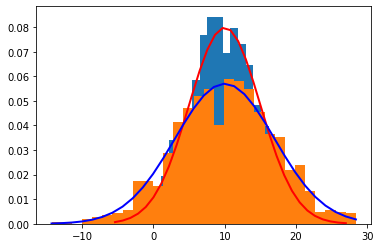

In [165]:
import matplotlib.pyplot as plt
count, bins, ignored = plt.hist(control, 30, density=True)
count2, bins2, ignored2 = plt.hist(experiment, 30, density=True)
plt.plot(bins, 1/(5 * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - 10)**2 / (2 * 5**2) ),
         linewidth=2, color='r')
plt.plot(bins2, 1/(7 * np.sqrt(2 * np.pi)) *
               np.exp( - (bins2 - 10)**2 / (2 * 7**2) ),
         linewidth=2, color='b')
plt.show()

In [166]:
ttest(control, experiment, alpha=0.05)

(0.26757981813573445, False)

In [167]:
quantile_ttest(control, experiment, alpha=0.05, quantile=0.95)

(0.0, True)

In [ ]:
control = gamma.rvs(1, size=1000)
experiment = gamma.rvs(2, size=1000)